## Классификация сервисов яндекс при помощи модели LigthGBM

In [755]:
import pandas as pd
import sys  
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

print("Pandas version: ", pd.__version__)
print("lightgbm version: ", lgb.__version__)

Pandas version:  2.0.3
lightgbm version:  4.0.0


In [756]:
current_path = 'jupyter/ya'


df_final_filename = f'{current_path}/df_final.csv'

dfFinal = pd.read_csv(df_final_filename)

print('df_final: ', dfFinal.shape)

df_final:  (4693, 40)


In [757]:
dfFinal.dropna(axis=1,inplace=True)

In [758]:
dfFinal.columns.to_list()

['proto',
 'packets_count',
 'f_pkts_num',
 'min_fiat',
 'min_biat',
 'flow_packets_per_second',
 'f_min_pkt_size',
 'b_min_pkt_size',
 'diag_step_fiat',
 'diag_step_biat',
 'diag_steps',
 'tcp_syn_count',
 'tcp_ack_count',
 'tcp_rst_count',
 'tcp_fin_count',
 'tcp_urg_count',
 'tcp_retr_count',
 'pktiat_0',
 'pktiat_1',
 'pktiat_2',
 'pktiat_7',
 'pktiat_9',
 'pktlen_1',
 'pktlen_8',
 'type']

In [759]:
y = dfFinal['type']
drop_col = ['type','proto','diag_step_fiat','diag_step_biat','diag_steps']
X  = dfFinal.drop(columns=drop_col)

#### Разобьем данные на подопытные и проверочные

In [760]:
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.3,
                                                        random_state=42,
                                                        stratify=None)

In [761]:
X_train.columns.to_list()

['packets_count',
 'f_pkts_num',
 'min_fiat',
 'min_biat',
 'flow_packets_per_second',
 'f_min_pkt_size',
 'b_min_pkt_size',
 'tcp_syn_count',
 'tcp_ack_count',
 'tcp_rst_count',
 'tcp_fin_count',
 'tcp_urg_count',
 'tcp_retr_count',
 'pktiat_0',
 'pktiat_1',
 'pktiat_2',
 'pktiat_7',
 'pktiat_9',
 'pktlen_1',
 'pktlen_8']

## LightGBM

In [762]:
estimator = lgb.LGBMClassifier(objective='multiclass', 
                               boosting_type = 'gbdt', 
                               num_class = '3',
                               n_estimators = 1, 
                               num_trees = 1,
                               min_child_samples = 2,
                               class_weight = 'balanced')

##### ...со следующим набором гиперпараметров

In [763]:
parameters = {
    'max_depth': [3,4,5],
    'num_leaves': [10,20,30],
    'learning_rate': [0.1, 0.5, 1],
    'feature_fraction': [0.3, 0.5, 1],
}

In [764]:
grid_search = GridSearchCV(estimator, param_grid=parameters, scoring='accuracy', cv=3)

In [765]:
grid_search.fit(X_train, y_train)

/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Foun

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000603 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1559
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 9
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is se

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1559
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 9
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start tra

/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Foun

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1564
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 9
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is se

/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Foun

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1559
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 9
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.

/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Foun

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1564
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 9
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Foun

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1559
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 9
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain:

/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Foun

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1559
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 9
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will

/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Foun

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1562
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 9
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is se

/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Foun

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1564
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 9
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.

/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Foun

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1562
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 9
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be igno

/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Foun

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1564
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 9
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=1, col

/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Foun

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1562
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 9
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current 

/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Foun

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1559
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 9
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of test

/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Foun

GridSearchCV(cv=3,
             estimator=LGBMClassifier(class_weight='balanced',
                                      min_child_samples=2, n_estimators=1,
                                      num_class='3', num_trees=1,
                                      objective='multiclass'),
             param_grid={'feature_fraction': [0.3, 0.5, 1],
                         'learning_rate': [0.1, 0.5, 1], 'max_depth': [3, 4, 5],
                         'num_leaves': [10, 20, 30]},
             scoring='accuracy')

In [766]:
grid_search.best_estimator_

LGBMClassifier(class_weight='balanced', feature_fraction=1, max_depth=5,
               min_child_samples=2, n_estimators=1, num_class='3',
               num_leaves=30, num_trees=1, objective='multiclass')

In [767]:
predictions_LGB = grid_search.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1


In [768]:
print(grid_search.score(X_test, y_test))

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
0.9332386363636364


Feature importances:


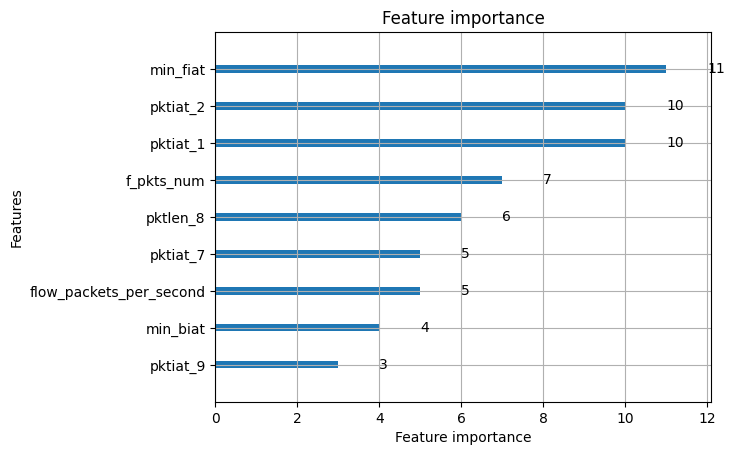


################################################################################
Confusion Matrix:


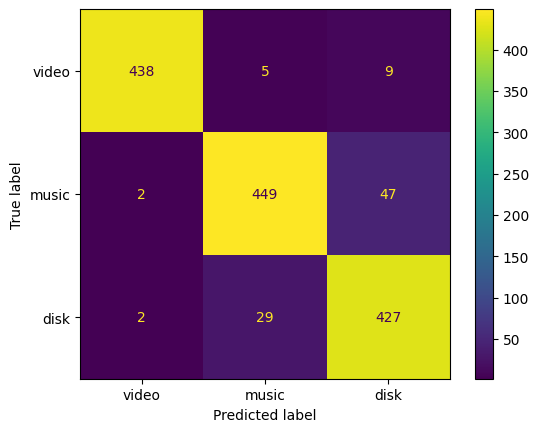


################################################################################
Classification Report:
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       452
           1       0.93      0.90      0.92       498
           2       0.88      0.93      0.91       458

    accuracy                           0.93      1408
   macro avg       0.93      0.93      0.93      1408
weighted avg       0.93      0.93      0.93      1408



In [769]:
feature_importances = np.zeros(X.shape[1])

print('Feature importances:')
lgb.plot_importance(grid_search.best_estimator_)
plt.show()

print('\n' + '#' * 80)
print('Confusion Matrix:')
    # functions.plot_confusion_matrix(valid_y, predictions_LGB.round(), "Analysis",
    #                                 index=["Std SSH", "Obf SSH"], columns=["Std SSH", "Obf SSH"])
    # metrics.confusion_matrix(model, valid_features, valid_y, cmap='Blues_r')
cm = confusion_matrix(y_test, predictions_LGB, labels=grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["video", "music", "disk"])
disp.plot() #cmap='Blues_r')
plt.show()
    
print('\n' + '#' * 80)
print('Classification Report:')
print(metrics.classification_report(y_test, grid_search.predict(X_test)))
plt.show()
    


In [770]:
# Make sure to average feature importances! 
feature_importances = grid_search.best_estimator_.feature_importances_ / 2
feature_importances = pd.DataFrame({'feature': list(X.columns),
                                    'importance': feature_importances}
                                  ).sort_values('importance', ascending = False)

feature_importances.head(10)

feature  importance
2                  min_fiat         5.5
15                 pktiat_2         5.0
14                 pktiat_1         5.0
1                f_pkts_num         3.5
19                 pktlen_8         3.0
4   flow_packets_per_second         2.5
16                 pktiat_7         2.5
3                  min_biat         2.0
17                 pktiat_9         1.5
12           tcp_retr_count         0.0

In [771]:
print(X_train.loc[1])
print(y_train.loc[1])

packets_count              10.000000
f_pkts_num                  4.000000
min_fiat                    0.000691
min_biat                    0.000010
flow_packets_per_second     1.000000
f_min_pkt_size             66.000000
b_min_pkt_size             66.000000
tcp_syn_count               0.000000
tcp_ack_count              10.000000
tcp_rst_count               0.000000
tcp_fin_count               0.000000
tcp_urg_count               0.000000
tcp_retr_count             10.000000
pktiat_0                    0.000000
pktiat_1                    0.007042
pktiat_2                    0.000323
pktiat_7                    0.000510
pktiat_9                    0.003134
pktlen_1                   66.000000
pktlen_8                   66.000000
Name: 1, dtype: float64
1


<Axes: >

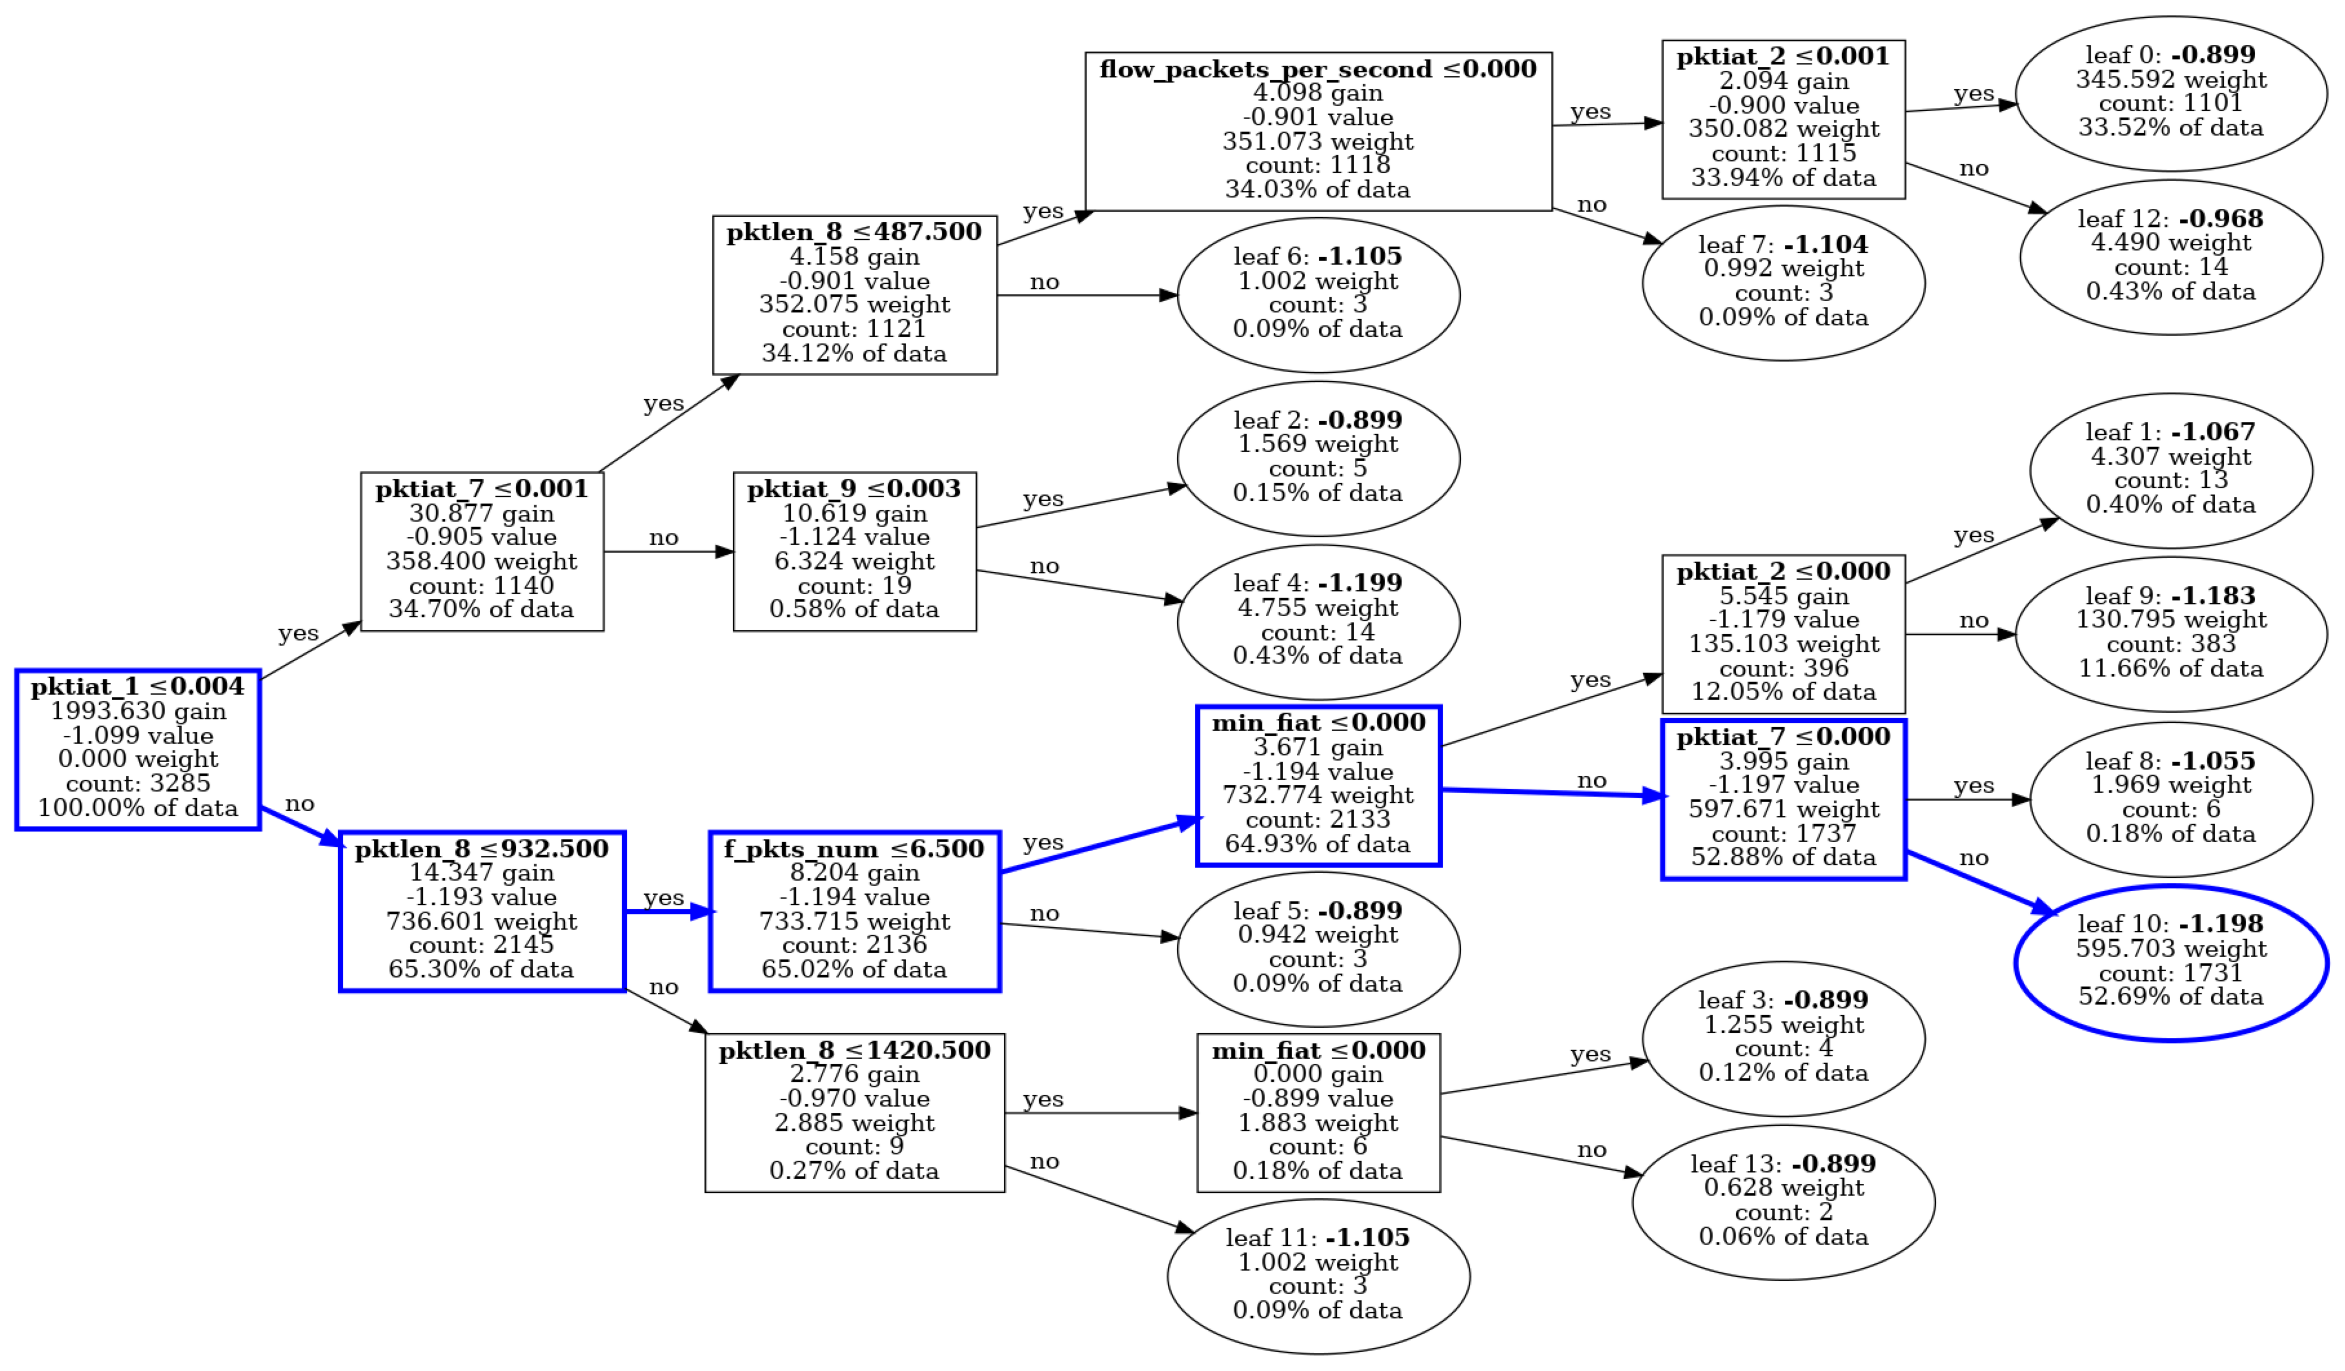

In [772]:
info = ['split_gain', 'internal_value', 'internal_count', 'internal_weight', 'leaf_count', 'leaf_weight', 'data_percentage']
lgb.plot_tree(grid_search.best_estimator_, tree_index=0, figsize=(30,40), show_info=info,example_case = X_train.loc[[1]])

<Axes: >

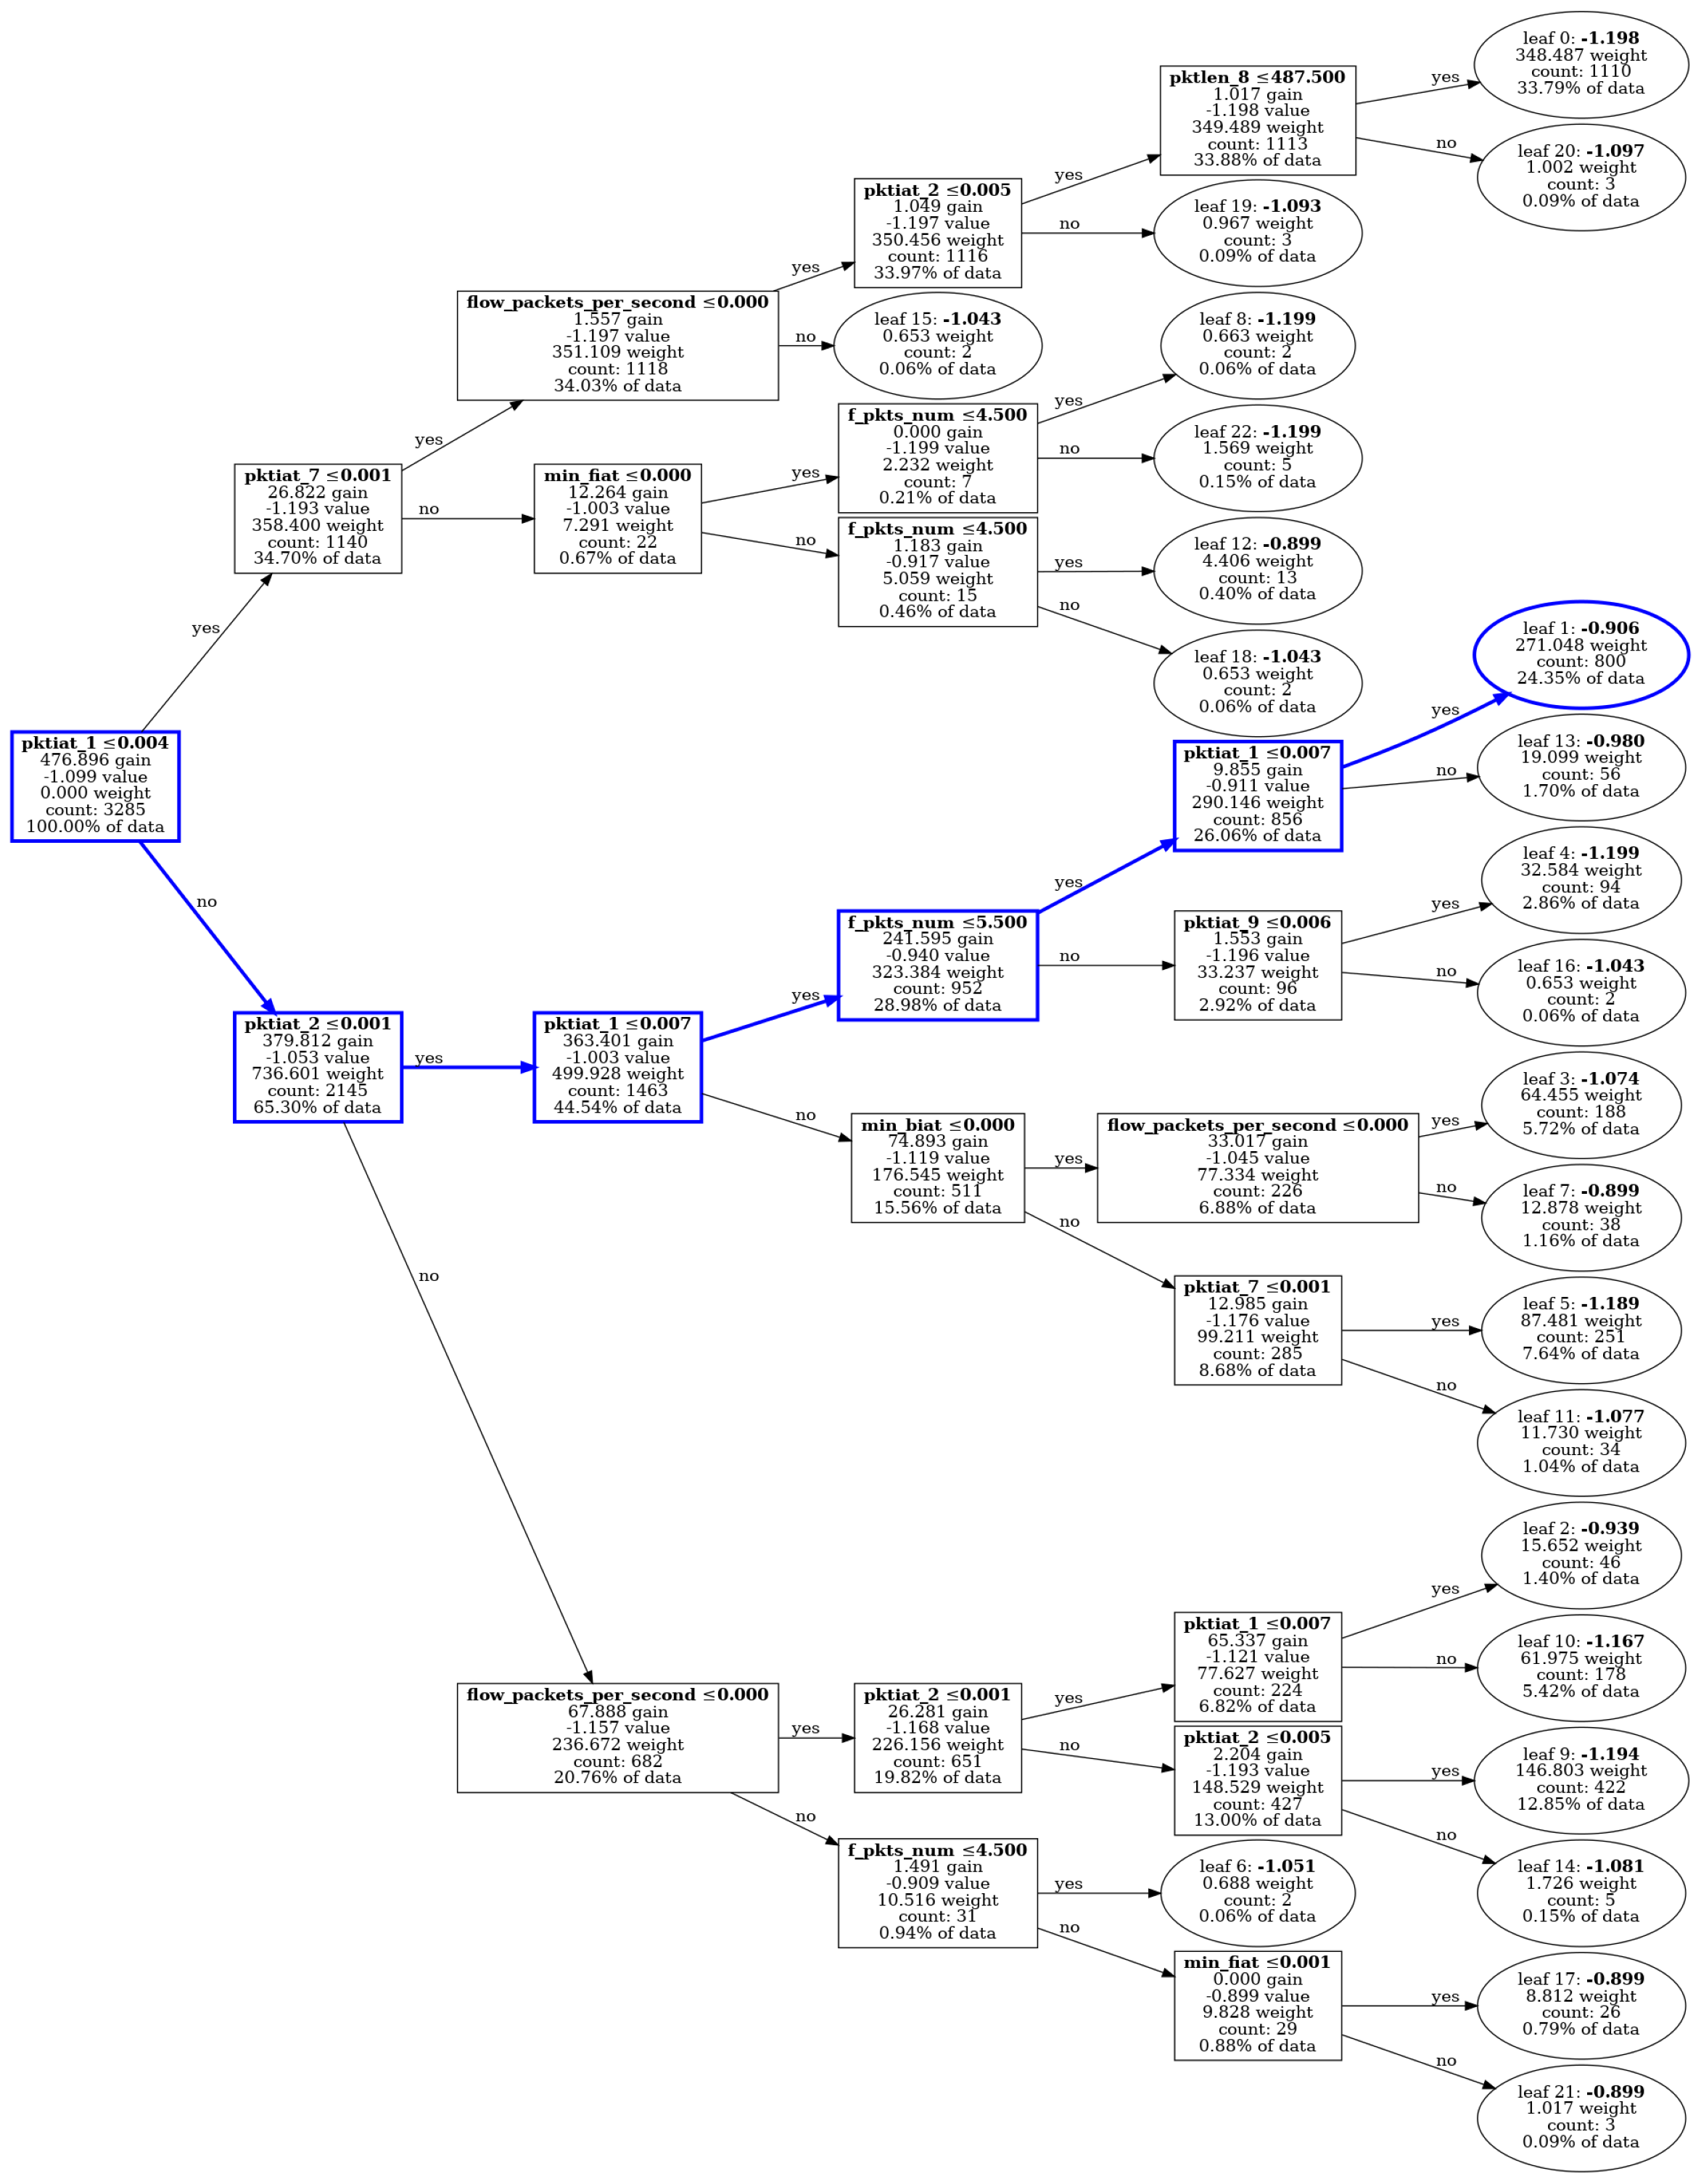

In [773]:

lgb.plot_tree(grid_search.best_estimator_, tree_index=1, figsize=(30,40), show_info=info,example_case = X_train.loc[[1]])


<Axes: >

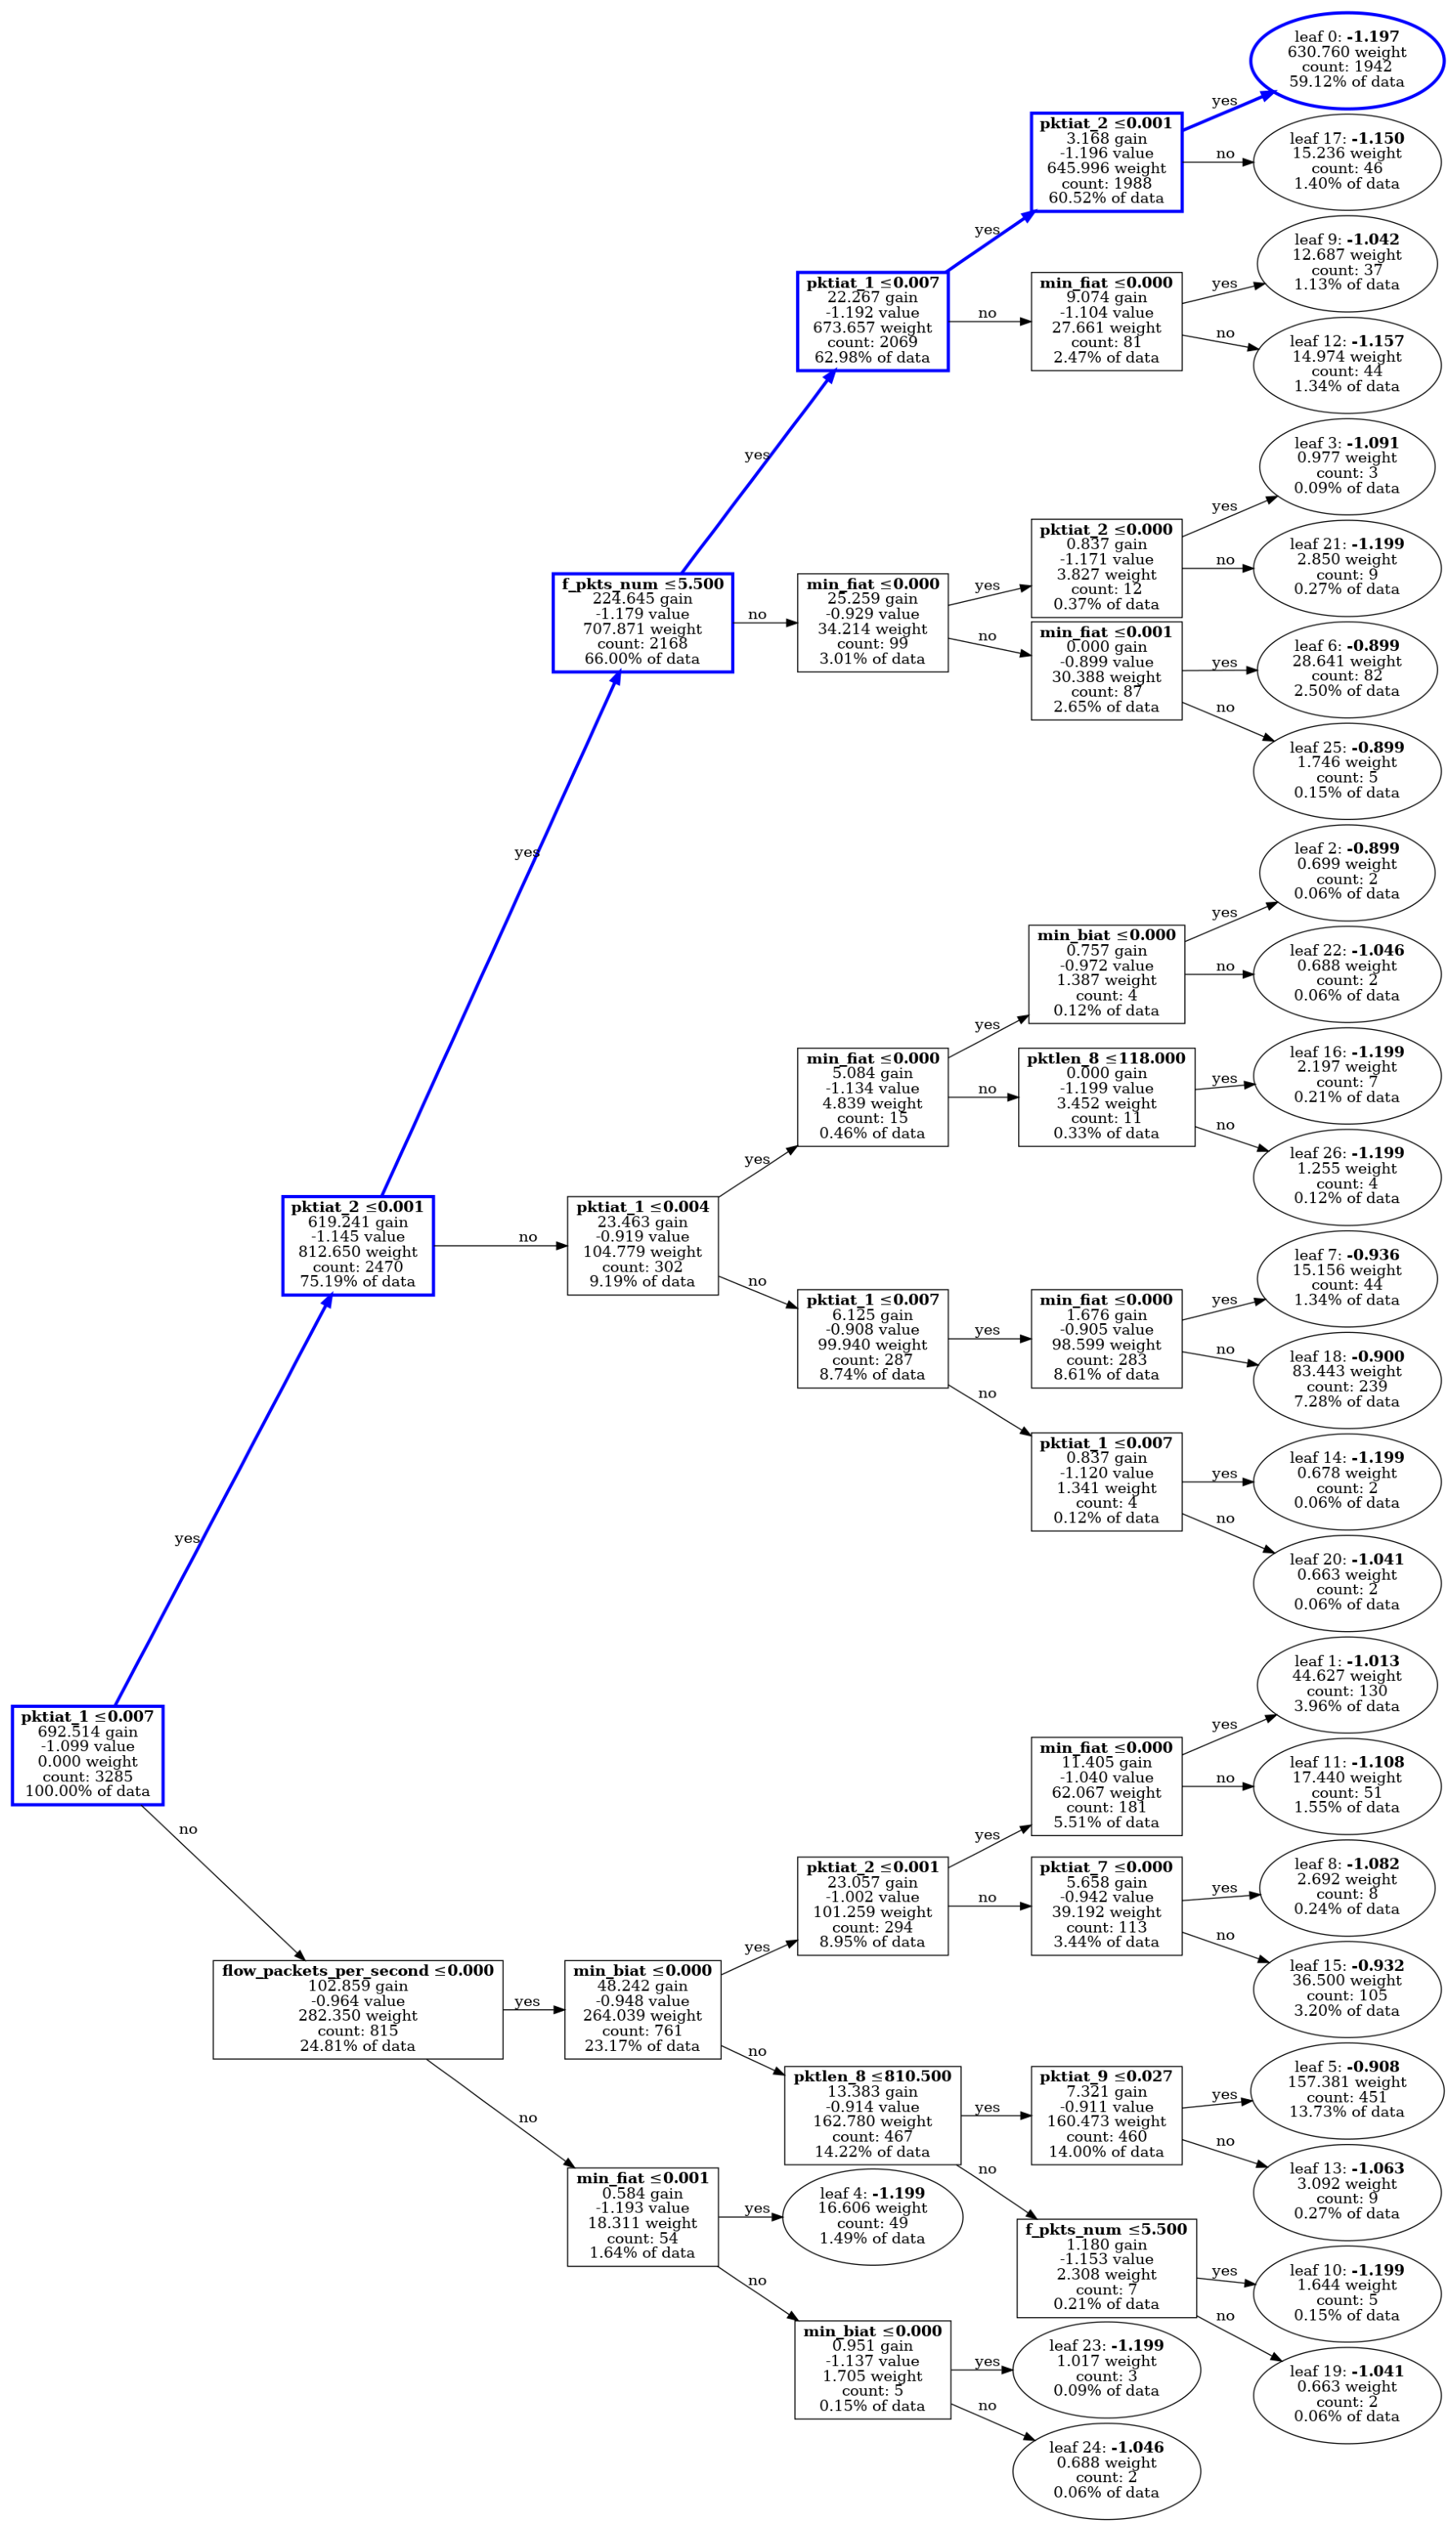

In [774]:
lgb.plot_tree(grid_search.best_estimator_, tree_index=2, figsize=(30,40), show_info=info,example_case = X_train.loc[[1]])

In [775]:
tree_df = grid_search.best_estimator_.booster_.trees_to_dataframe()
print(tree_df.tree_index.max())
grid_search.best_estimator_.booster_.trees_to_dataframe()

2


tree_index  node_depth node_index left_child right_child parent_index  \
0             0           1       0-S0       0-S1        0-S2         None   
1             0           2       0-S1       0-S5        0-S3         0-S0   
2             0           3       0-S5       0-S6        0-L6         0-S1   
3             0           4       0-S6      0-S11        0-L7         0-S5   
4             0           5      0-S11       0-L0       0-L12         0-S6   
..          ...         ...        ...        ...         ...          ...   
120           2           3      2-S22       2-L4       2-S23         2-S3   
121           2           4       2-L4       None        None        2-S22   
122           2           4      2-S23      2-L23       2-L24        2-S22   
123           2           5      2-L23       None        None        2-S23   
124           2           5      2-L24       None        None        2-S23   

               split_feature   split_gain     threshold decision_type  \
0                   pktiat_1  1993.630005  4.460454e-03            <=   
1                   pktiat_7    30.877300  8.870363e-04            <=   
2                   pktlen_8     4.157890  4.875000e+02            <=   
3    flow_packets_per_second     4.098460  1.000000e-35            <=   
4                   pktiat_2     2.093930  1.468897e-03            <=   
..                       ...          ...           ...           ...   
120                 min_fiat     0.584054  7.025003e-04            <=   
121                     None          NaN           NaN          None   
122                 min_biat     0.951457  4.899502e-05            <=   
123                     None          NaN           NaN          None   
124                     None          NaN           NaN          None   

    missing_direction missing_type     value      weight  count  
0                left         None -1.098610    0.000000   3285  
1                left         None -0.905172  358.400000   1140  
2                left         None -0.901238  352.075000   1121  
3                left         None -0.900657  351.073000   1118  
4                left         None -0.900082  350.082000   1115  
..                ...          ...       ...         ...    ...  
120              left         None -1.192890   18.311200     54  
121              None         None -1.198612   16.606315     49  
122              left         None -1.137150    1.704900      5  
123              None         None -1.198612    1.016713      3  
124              None         None -1.046350    0.688187      2  

[125 rows x 15 columns]

In [776]:
X_train.columns.to_list()

['packets_count',
 'f_pkts_num',
 'min_fiat',
 'min_biat',
 'flow_packets_per_second',
 'f_min_pkt_size',
 'b_min_pkt_size',
 'tcp_syn_count',
 'tcp_ack_count',
 'tcp_rst_count',
 'tcp_fin_count',
 'tcp_urg_count',
 'tcp_retr_count',
 'pktiat_0',
 'pktiat_1',
 'pktiat_2',
 'pktiat_7',
 'pktiat_9',
 'pktlen_1',
 'pktlen_8']

In [777]:
import joblib

joblib.dump(grid_search.best_estimator_, f'{current_path}/model_lightgbm.pkl')

['jupyter/ya/model_lightgbm.pkl']

In [778]:
from sklearn.feature_selection import RFE
model_for_rfe = grid_search.best_estimator_

rfe = RFE(model_for_rfe, n_features_to_select=4, step=1)
X_train_rfe = X_train
y_train_rfe = y_train
fit = rfe.fit(X_train_rfe,y_train_rfe)


[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001006 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1567
[LightGBM] [Info] Number of data points in the train set: 3285, number of used features: 9
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Foun

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] num_iterations is set=1, num_trees=1 will be ignored. Current value: num_iterations=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000555 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1567
[LightGBM] [Info] Number of data points in the train set: 3285, number of used features: 9
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

/opt/bitnami/miniconda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [779]:
print(("Число признаков: %d") %fit.n_features_)
print(("Отобранные признаки: %s") %fit.support_)
print(("Ранг признаков: %s") %fit.ranking_)

Число признаков: 4
Отобранные признаки: [False False  True False False False False False False False False False
 False False False  True  True False False  True]
Ранг признаков: [17  3  1  5  4 13 12 11 10 15 16 14  9  8  2  1  1  6  7  1]


In [780]:
feature_names_rfe = fit.get_feature_names_out()
print(feature_names_rfe)

['min_fiat' 'pktiat_2' 'pktiat_7' 'pktlen_8']


In [781]:
print(fit.score(X_test,y_test))

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
0.8664772727272727


In [782]:
dfFinal_new = dfFinal[feature_names_rfe]
y = dfFinal['type']

X  = dfFinal_new

#### Разобьем данные на подопытные и проверочные

In [783]:
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.3,
                                                        random_state=42,
                                                        stratify=None)

In [784]:
X.shape

(4693, 4)

## LightGBM

In [785]:
estimator = lgb.LGBMClassifier(objective='multiclass', 
                               boosting_type = 'gbdt', 
                               num_class = '3',
                               n_estimators = 100, 
                               class_weight = 'balanced')

##### ...со следующим набором гиперпараметров

In [786]:
parameters = {
    'max_depth': [4],
    'num_leaves': [20],
    'min_child_samples': [19],
    'min_child_weight': [0.002],
    'feature_fraction': [0.6],
}

In [787]:
grid_search = GridSearchCV(estimator, param_grid=parameters, scoring='accuracy', cv=3)

In [788]:
grid_search.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

GridSearchCV(cv=3,
             estimator=LGBMClassifier(class_weight='balanced', num_class='3',
                                      objective='multiclass'),
             param_grid={'feature_fraction': [0.6], 'max_depth': [4],
                         'min_child_samples': [19], 'min_child_weight': [0.002],
                         'num_leaves': [20]},
             scoring='accuracy')

In [789]:
grid_search.best_estimator_

LGBMClassifier(class_weight='balanced', feature_fraction=0.6, max_depth=4,
               min_child_samples=19, min_child_weight=0.002, num_class='3',
               num_leaves=20, objective='multiclass')

In [790]:
predictions_LGB = grid_search.predict(X_test)
print(grid_search.score(X_test, y_test))

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
0.8977272727272727


Feature importances:


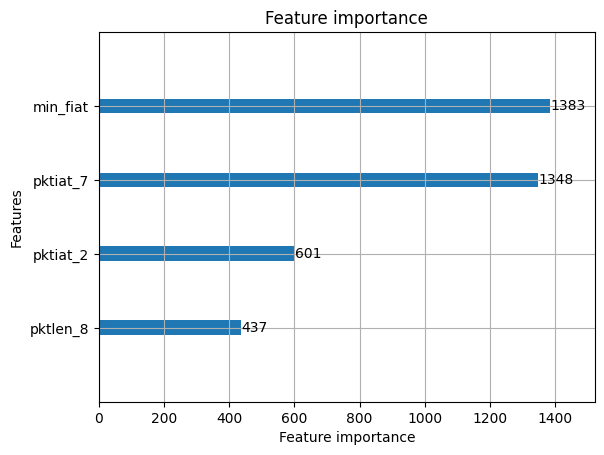


################################################################################
Confusion Matrix:


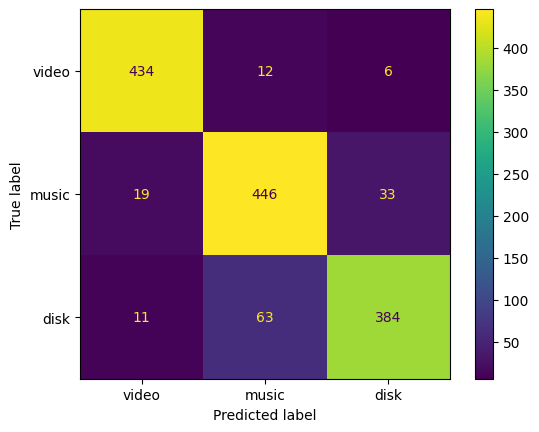


################################################################################
Classification Report:
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       452
           1       0.86      0.90      0.88       498
           2       0.91      0.84      0.87       458

    accuracy                           0.90      1408
   macro avg       0.90      0.90      0.90      1408
weighted avg       0.90      0.90      0.90      1408



In [791]:
feature_importances = np.zeros(X.shape[1])

print('Feature importances:')
lgb.plot_importance(grid_search.best_estimator_)
plt.show()

print('\n' + '#' * 80)
print('Confusion Matrix:')
    # functions.plot_confusion_matrix(valid_y, predictions_LGB.round(), "Analysis",
    #                                 index=["Std SSH", "Obf SSH"], columns=["Std SSH", "Obf SSH"])
    # metrics.confusion_matrix(model, valid_features, valid_y, cmap='Blues_r')
cm = confusion_matrix(y_test, predictions_LGB, labels=grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["video", "music", "disk"])
disp.plot() #cmap='Blues_r')
plt.show()
    
print('\n' + '#' * 80)
print('Classification Report:')
print(metrics.classification_report(y_test, grid_search.predict(X_test)))
plt.show()

<Axes: >

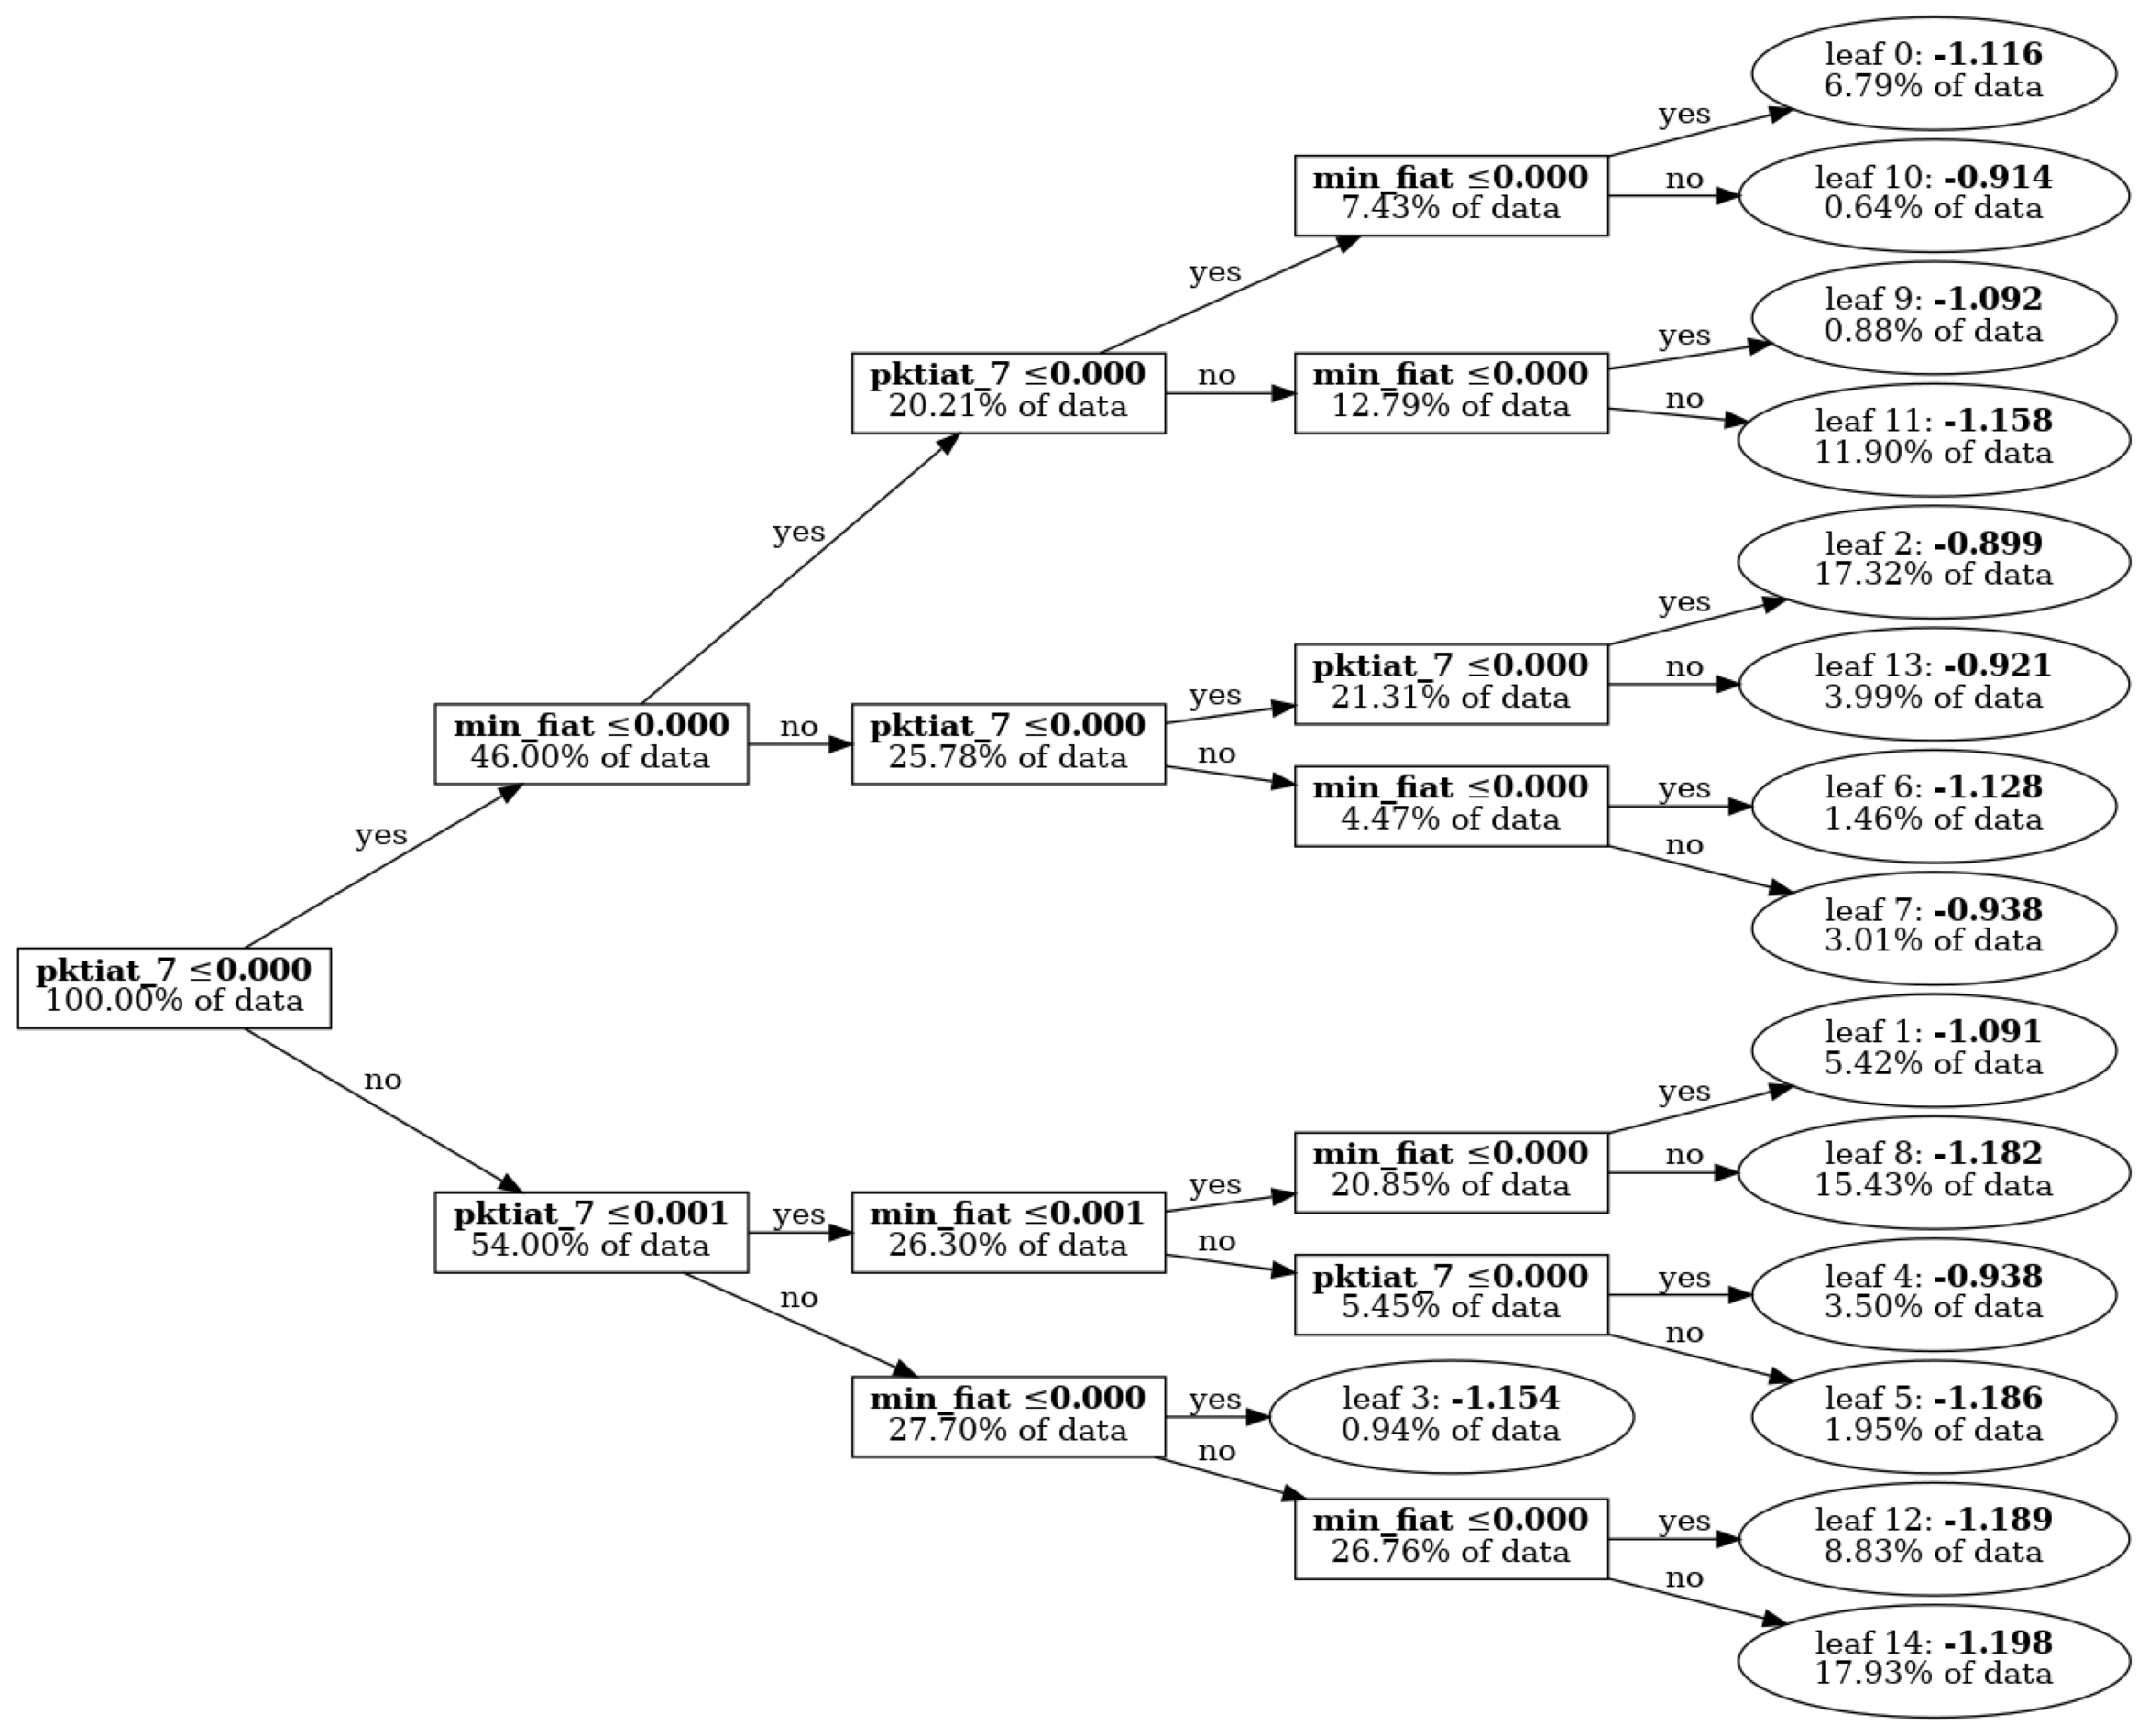

In [792]:
lgb.plot_tree(grid_search.best_estimator_, figsize=(30,40), show_info=['data_percentage',])

## Final test on X

In [793]:
predicted_X = grid_search.predict(X)
print('LGB accuracy:', accuracy_score(y, predicted_X))

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
LGB accuracy: 0.9224376731301939


## Save model

In [794]:
import joblib

joblib.dump(grid_search.best_estimator_, f'{current_path}/model_lightgbm_2.pkl')

['jupyter/ya/model_lightgbm_2.pkl']